In [1]:
import sys
sys.path.append('..')

import os
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform
from PIL import Image

from datasets.ice import IceWithProposals

In [2]:
data_dir = '../data'
img_scale = .5
img_crop = 500

train_set = IceWithProposals(os.path.join(data_dir, 'imgs'), os.path.join(data_dir, 'masks'),
                  os.path.join(data_dir, 'txt_files'), os.path.join(data_dir, 'proposals/binary_250_16'), 'train', img_scale, img_crop)
val_set = IceWithProposals(os.path.join(data_dir, 'imgs'), os.path.join(data_dir, 'masks'),
                  os.path.join(data_dir, 'txt_files'), os.path.join(data_dir, 'proposals/binary_250_16'), 'val', img_scale, img_crop)
test_set = IceWithProposals(os.path.join(data_dir, 'imgs'), os.path.join(data_dir, 'masks'),
                  os.path.join(data_dir, 'txt_files'), os.path.join(data_dir, 'proposals/binary_250_16'), 'test', img_scale, img_crop)

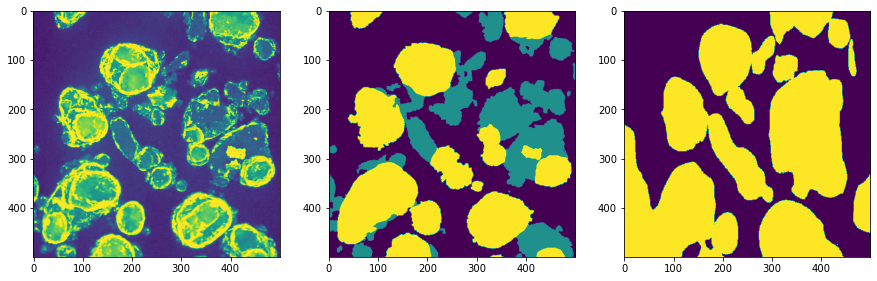

In [5]:
i = 0
fig, axs = plt.subplots(1,3, figsize=(15,15));
axs[0].imshow(train_set[i]['image'].permute(1,2,0).detach().cpu().numpy()[:,:,0]);
axs[1].imshow(train_set[i]['mask'].squeeze(0).detach().cpu().numpy());
axs[2].imshow(train_set[i]['prop'].squeeze(0).detach().cpu().numpy());

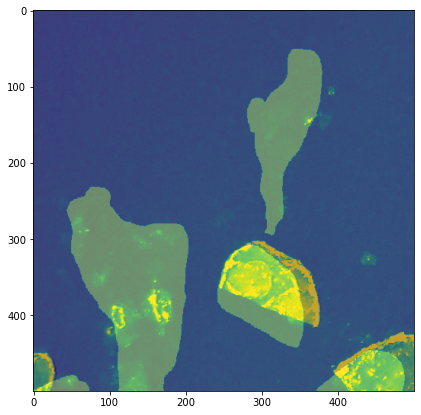

In [16]:
i=10
fig, ax = plt.subplots(figsize=(7,7));
ax.imshow(train_set[i]['image'].permute(1,2,0).detach().cpu().numpy()[:,:,0]);
ax.imshow(train_set[i]['prop'].squeeze(0).detach().cpu().numpy(), alpha=0.3);

In [7]:
ice_count, water_count = [], []
n_pixels = img_crop ** 2

for i, batch in enumerate(train_set):
    prop = batch['prop']
    ice = prop.sum().item()
    ice_count.append(ice)
    water_count.append(n_pixels-ice)

for i, batch in enumerate(val_set):
    prop = batch['prop']
    ice = prop.sum().item()
    ice_count.append(ice)
    water_count.append(n_pixels-ice)
    
for i, batch in enumerate(test_set):
    prop = batch['prop']
    ice = prop.sum().item()
    ice_count.append(ice)
    water_count.append(n_pixels-ice)

(array([3., 3., 4., 8., 4., 9., 7., 6., 4., 2.]),
 array([ 5118. ,  8163.7, 11209.4, 14255.1, 17300.8, 20346.5, 23392.2,
        26437.9, 29483.6, 32529.3, 35575. ]),
 <BarContainer object of 10 artists>)

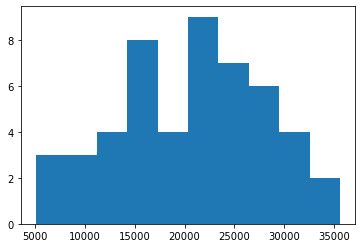

In [8]:
plt.hist(ice_count)

(array([2., 4., 6., 7., 9., 4., 8., 4., 3., 3.]),
 array([12825. , 15870.7, 18916.4, 21962.1, 25007.8, 28053.5, 31099.2,
        34144.9, 37190.6, 40236.3, 43282. ]),
 <BarContainer object of 10 artists>)

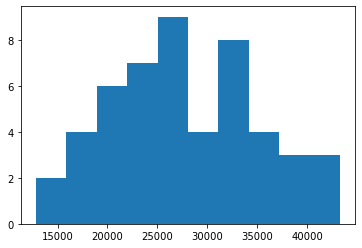

In [9]:
plt.hist(water_count)

<ipython-input-3-77ddbcf4169a>:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


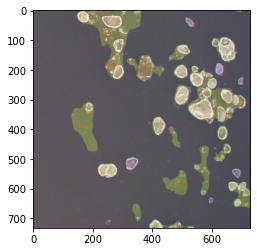

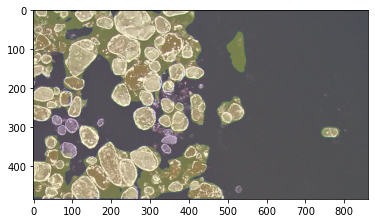

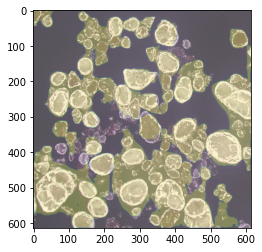

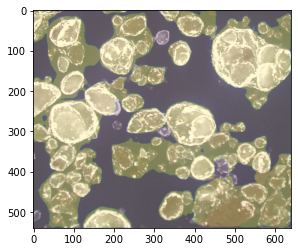

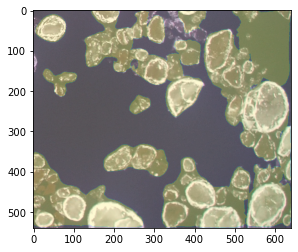

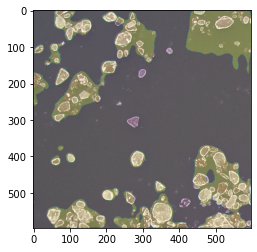

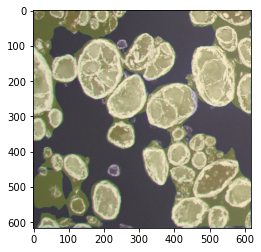

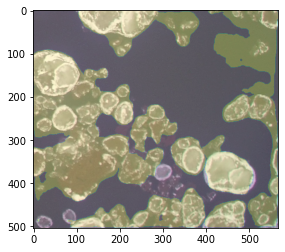

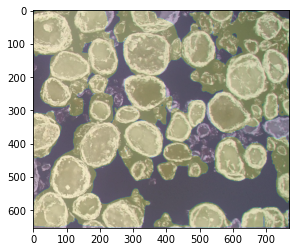

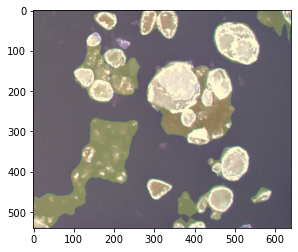

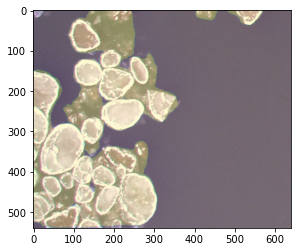

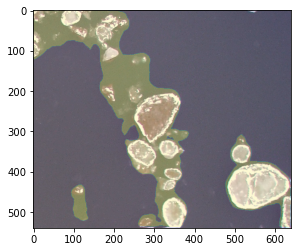

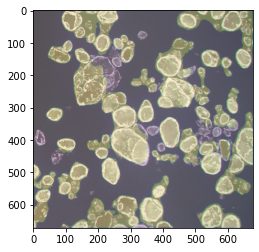

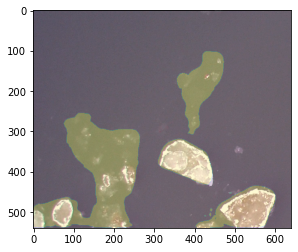

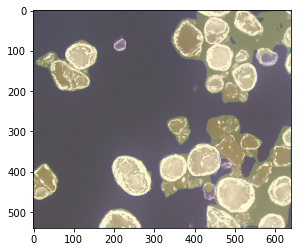

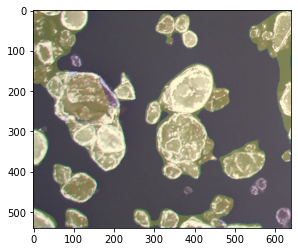

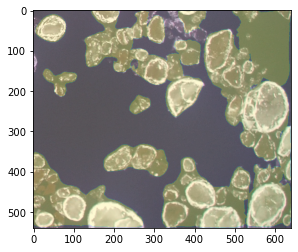

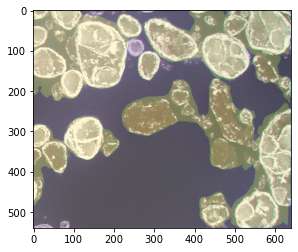

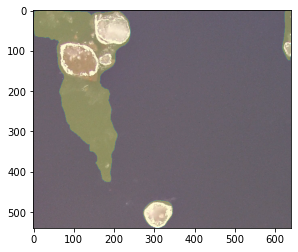

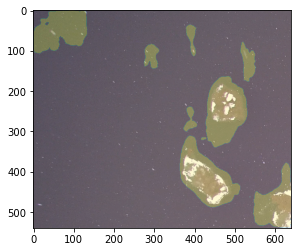

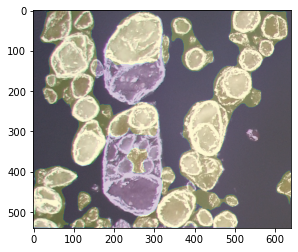

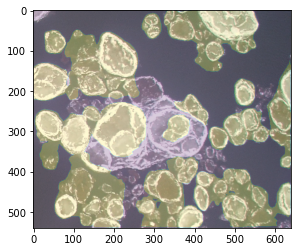

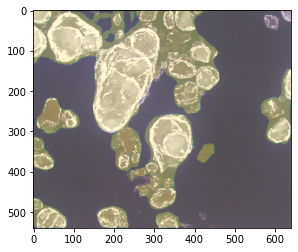

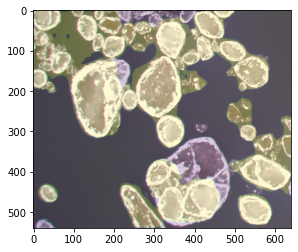

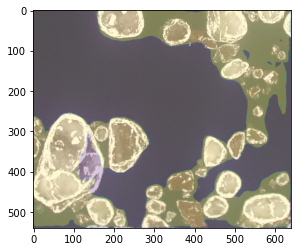

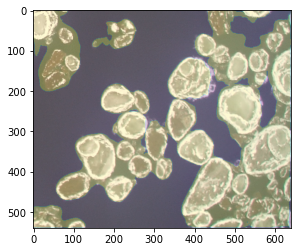

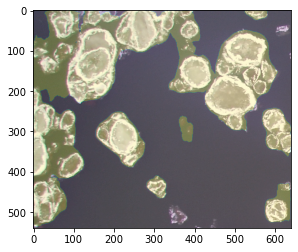

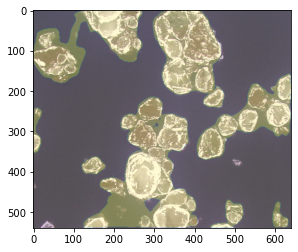

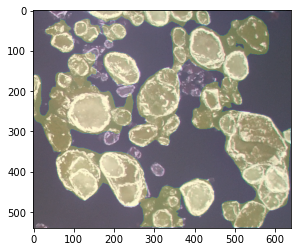

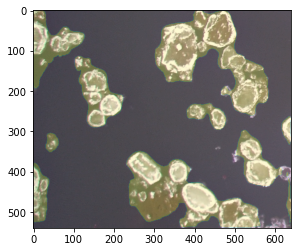

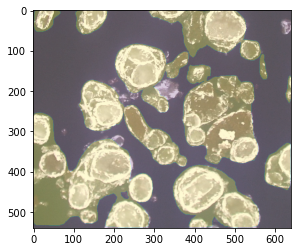

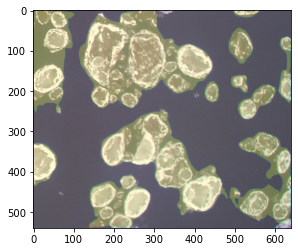

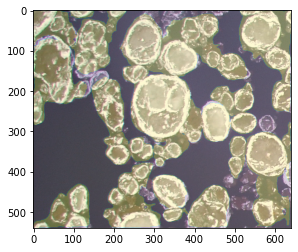

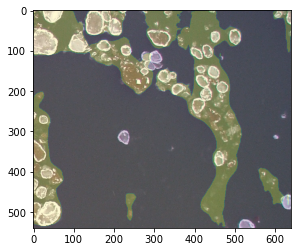

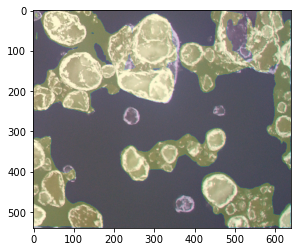

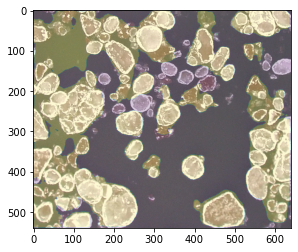

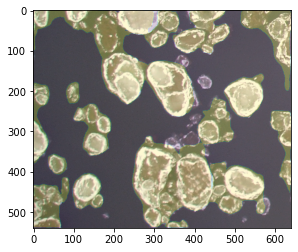

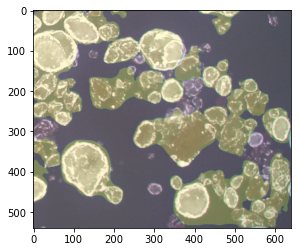

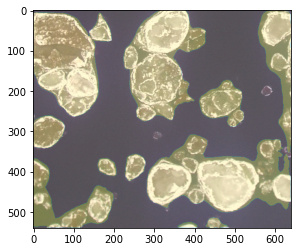

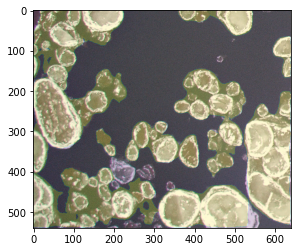

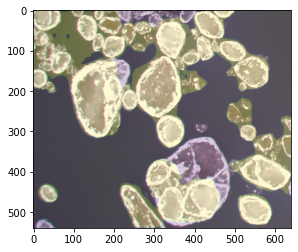

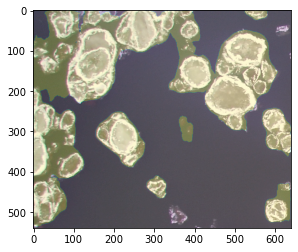

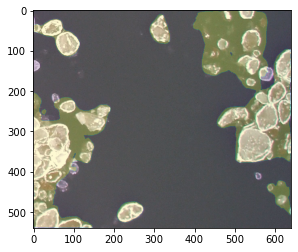

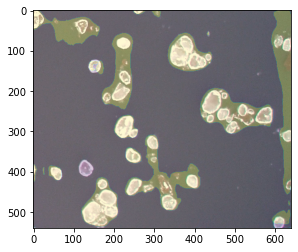

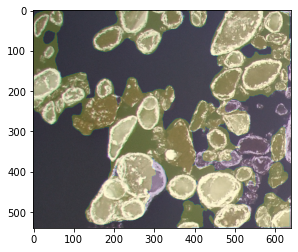

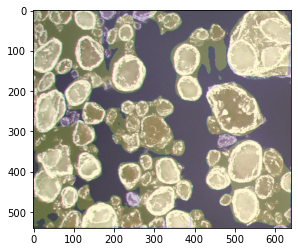

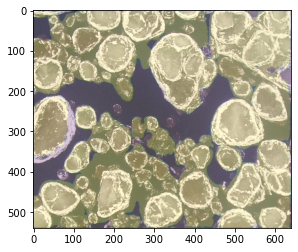

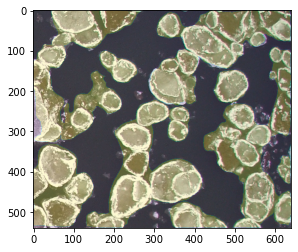

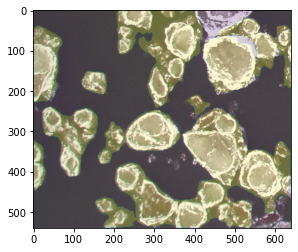

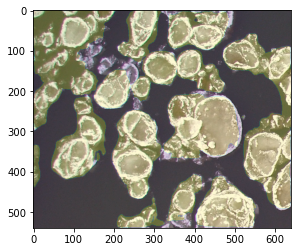

In [3]:
for NUM in range(1, 51):
#     NUM = 5
    proposal = np.load(f"../data/proposals/masks/masks_{NUM}.npy")
    img = Image.open(f"../data/imgs/img_{NUM}.tif")

    h, w = img.size
    newW, newH = np.round_(0.5 * w), np.round_(0.5 * h)
    assert newW > 0 and newH > 0, 'Scale is too small'
    img_nd = np.array(img)
    img_nd = skimage.transform.resize(img_nd,
                                      (newW, newH),
                                      mode='edge',
                                      anti_aliasing=False,
                                      anti_aliasing_sigma=None,
                                      preserve_range=True,
                                      order=0)
    img_nd = img_nd.astype(int)

    proposals = np.zeros_like(proposal[:, :, 0])
    for ind in range(250):
        if proposal[:, :, ind].sum() < (proposal.shape[0]*proposal.shape[1])/16:
            proposals[(proposal[:,:,ind]==1)] = 1

    fig, ax = plt.subplots()
    ax.imshow(img_nd)
    ax.imshow(proposals, alpha=0.2)